Detecting spam alerts in emails and messages is one of the main applications that every big tech company tries to improve for its customers. Apple’s official messaging app and Google’s Gmail are great examples of such applications where spam detection works well to protect users from spam alerts. 

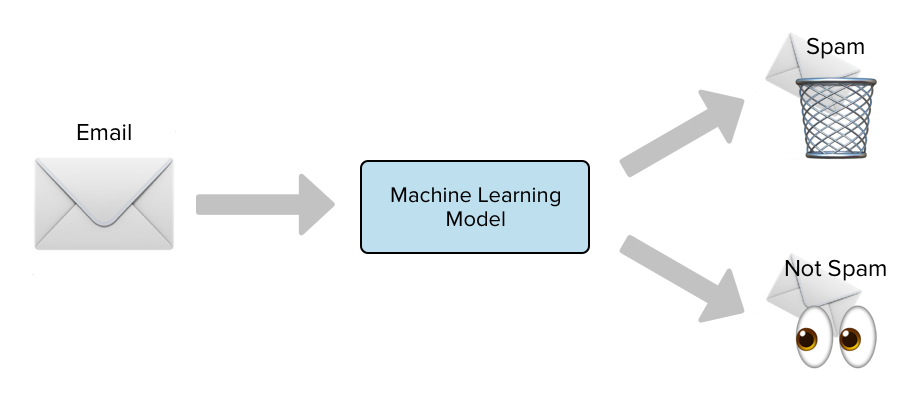

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression as LR


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')


In [ ]:
df.head()

In [ ]:
df['class'] = df['class'].map(lambda x :x if x == 'spam' else 'not_spam')

In [ ]:
df.head(5)

In [ ]:
df.isnull()

In [ ]:
x = np.array(df["message"])
y = np.array(df["class"])


# Calculate the spam and ham messages

In [ ]:
spam = 0
ham = 0
for item in y:
    if item == 'spam':
        spam = spam + 1
    else:
        ham = ham +1

In [ ]:
spam, ham

In [ ]:
# Simple Method

In [ ]:
unique, counts = np.unique(y, return_counts=True)


In [ ]:
unique,counts

# Plot the values

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(unique,counts)

In [ ]:
# Machines understands only 1010 i.e binary numbers. TFidfVectorizer converts text to numbers
# 1. Declare 
cv = TfidfVectorizer()


In [ ]:
# Apply on messages i.e X
X = cv.fit_transform(x) # Fit the Data


In [ ]:
X

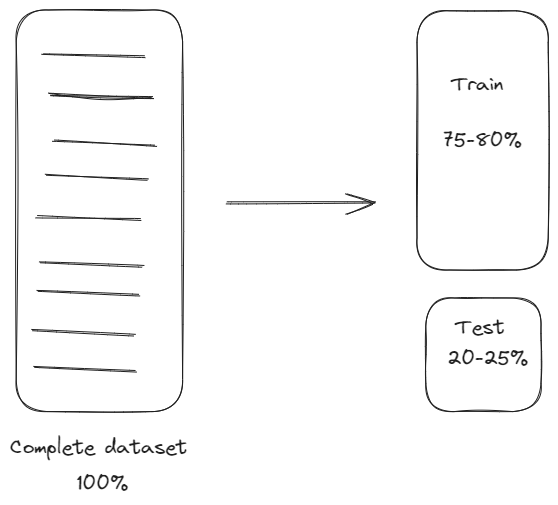

In [ ]:
# Divide the data in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



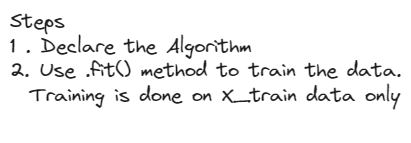

In [ ]:
# Declare the ML algorithm
clf = LR(solver='liblinear', penalty='l1')


In [ ]:
# Train data using algorithm
model = clf.fit(X_train,y_train)

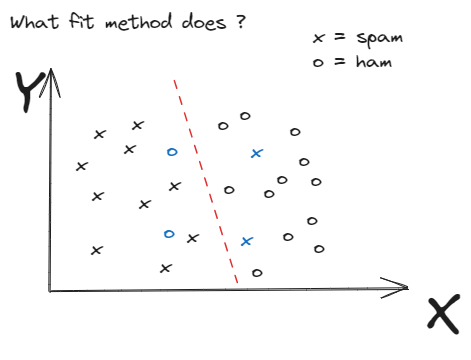

In [ ]:
# Test the model 
y_pred = clf.predict(X_test)

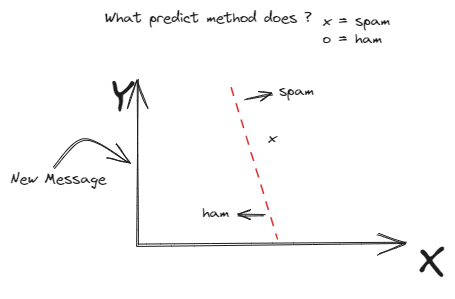

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

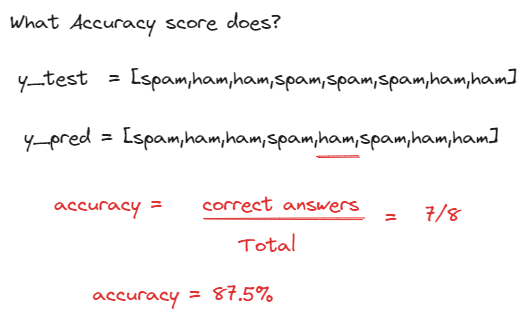

In [ ]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

# Test another model 

In [ ]:
# DEclare the ML algorithm
nb = MultinomialNB()

In [ ]:
# Train data using algorithm
model2 = nb.fit(X_train,y_train)

In [ ]:
# Test the model 
y_pred2 = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

In [ ]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(nb.predict(data))

# Balance the dataset

In [ ]:
unique, counts = np.unique(y, return_counts=True)


In [ ]:
unique, counts

In [ ]:
df_new = df[['class','message']]

In [ ]:
temp_ham = df_new[df_new['class'] == 'ham']

In [ ]:
temp_ham = temp_ham.iloc[:747,:]

In [ ]:
temp_ham

In [ ]:
temp_spam = df_new[df_new['class'] == 'spam']

In [ ]:
temp_spam

In [ ]:
# Combine the two DataFrames
combined_df = pd.concat([temp_spam, temp_ham], ignore_index=True)

# Shuffle the rows
balanced_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
x = np.array(balanced_df["message"])
y = np.array(balanced_df["class"])


In [ ]:
unique, counts = np.unique(y, return_counts=True)

In [ ]:
plt.bar(unique,counts)

In [ ]:
# Machines understands only 1010 i.e binary numbers. TFidfVectorizer converts text to numbers
# 1. Declare 
cv = TfidfVectorizer()
# Apply on messages i.e X
X = cv.fit_transform(x) # Fit the Data
# Diveide the data in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# DEclare the ML algorithm
clf = LR(solver='liblinear', penalty='l1')
# Train data using algorithm
model = clf.fit(X_train,y_train)
# Test the model 
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


In [ ]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))